# **Scrapping data with google playstore**

# ***APP Mobile Legends Content Sentiment Analysis Using NLP and K-Means***

In [53]:
!pip install google-play-scraper

**Scrape desired number of reviews**

In [54]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.mobile.legends', #link app store
    lang = 'id', #defaults to 'en'
    country = 'id', #defaults to 'us'
    sort = Sort.NEWEST, #get data newest
    count = 100, #defaults get try 2000 data
    filter_score_with = None #defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [55]:
#import pandas and numpy
import pandas as pd
import numpy as np

df_busu = pd.DataFrame(np.array(result), columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,71b4a9ca-2f65-4318-a8aa-f1c6b2ce456c,alfath adriansyah,https://play-lh.googleusercontent.com/a/ACg8oc...,Suka dengan aplikasi mobile legend,5,0,1.6.52.7102,2024-09-23 01:43:58,None,NaT,1.6.52.7102
1,2af4b8b0-5d14-4f9e-9539-869a156f93a6,Marvin Marcias,https://play-lh.googleusercontent.com/a/ACg8oc...,Kerad sekali game ini mantap,5,0,19.2.11.103,2024-09-23 01:43:10,None,NaT,19.2.11.103
2,f7073fe3-0c4e-43e4-a5df-589fc08a88c8,FDL Izz,https://play-lh.googleusercontent.com/a/ACg8oc...,Game nya seru tapi perbaiki sinyal nya tolong ...,5,0,1.9.16.9839,2024-09-23 01:43:08,None,NaT,1.9.16.9839
3,5496910e-9409-4d88-b8c6-695fbca8397f,Ahmad Adil,https://play-lh.googleusercontent.com/a/ACg8oc...,mantappppo,5,0,19.2.11.103,2024-09-23 01:43:07,None,NaT,19.2.11.103
4,dc59d6bb-c8da-48a9-9531-8f17869731fd,KRISNO ARDI KUNCORO,https://play-lh.googleusercontent.com/a-/ALV-U...,Good game,4,0,1.9.8.9833,2024-09-23 01:42:47,None,NaT,1.9.8.9833
5,be9f3512-3f24-4acb-a12b-d6db88dd4416,Miranda Mulfit,https://play-lh.googleusercontent.com/a/ACg8oc...,Mannnnntp,5,0,1.9.11.9836,2024-09-23 01:42:40,None,NaT,1.9.11.9836
6,8e6d5ea0-21ca-4d41-9be3-5e42cc560f91,Hp Vivo,https://play-lh.googleusercontent.com/a/ACg8oc...,Game yg sangat menghibur,5,0,1.9.8.9833,2024-09-23 01:42:26,None,NaT,1.9.8.9833
7,34eaf955-ff7e-4138-bd16-03acc6b300d4,Kuswan Toro,https://play-lh.googleusercontent.com/a-/ALV-U...,"game nya seru, player nya pada sopan santun",5,0,19.2.11.103,2024-09-23 01:42:26,None,NaT,19.2.11.103
8,5a72adba-3031-4b67-bb49-f7129aecc3ac,Muludin Lud,https://play-lh.googleusercontent.com/a/ACg8oc...,Lumayan,4,0,1.9.16.9839,2024-09-23 01:42:23,None,NaT,1.9.16.9839
9,af95df8c-a4ea-4aee-8cb5-f86eedbaa377,SASUKE Gaming,https://play-lh.googleusercontent.com/a-/ALV-U...,Game ini sangat seru,5,0,19.2.11.103,2024-09-23 01:42:18,None,NaT,19.2.11.103


In [56]:
#check for get data
len(df_busu.index)

100

In [57]:
df_busu[['userName', 'score', 'at', 'content']].head(10)

,userName,score,at,content
0,alfath adriansyah,5,2024-09-23 01:43:58,Suka dengan aplikasi mobile legend
1,Marvin Marcias,5,2024-09-23 01:43:10,Kerad sekali game ini mantap
2,FDL Izz,5,2024-09-23 01:43:08,Game nya seru tapi perbaiki sinyal nya tolong ...
3,Ahmad Adil,5,2024-09-23 01:43:07,mantappppo
4,KRISNO ARDI KUNCORO,4,2024-09-23 01:42:47,Good game
5,Miranda Mulfit,5,2024-09-23 01:42:40,Mannnnntp
6,Hp Vivo,5,2024-09-23 01:42:26,Game yg sangat menghibur
7,Kuswan Toro,5,2024-09-23 01:42:26,"game nya seru, player nya pada sopan santun"
8,Muludin Lud,4,2024-09-23 01:42:23,Lumayan
9,SASUKE Gaming,5,2024-09-23 01:42:18,Game ini sangat seru


In [58]:
if 'score' in df_busu.columns:
    Sentiment = []
    for index, row in df_busu.iterrows():
      if row['score'] > 3:
        Sentiment.append('positif')
      else:
        Sentiment.append('negatif')
    df_busu['sentiment'] = Sentiment

In [59]:
# Memilih hanya kolom 'content dan 'Sentiment'
df_busu = df_busu[['content', 'sentiment']]

# Menampilkan sepuluh baris pertama dari DataFrame yang telah difilter
df_busu.head(10)

,content,sentiment
0,Suka dengan aplikasi mobile legend,positif
1,Kerad sekali game ini mantap,positif
2,Game nya seru tapi perbaiki sinyal nya tolong ...,positif
3,mantappppo,positif
4,Good game,positif
5,Mannnnntp,positif
6,Game yg sangat menghibur,positif
7,"game nya seru, player nya pada sopan santun",positif
8,Lumayan,positif
9,Game ini sangat seru,positif


In [60]:
df_busu.isnull().sum()

,0
content,0
sentiment,0


In [61]:
df_busu.shape

(100, 2)

In [62]:
my_df = df_busu[['content', 'sentiment']]

In [63]:
my_df.to_csv("scrapped_data_mobile_legends.csv", index = False)

# **IMPORTING DATASET**

Dataset didapatkan menggunakan teknik web scraping dari website google playstore. Disini saya menggunakan library pandas untuk menampilkan dan membaca dataset.

In [64]:
import string

data = pd.read_csv('scrapped_data_mobile_legends.csv', sep=',', encoding='latin1')
data.head(10)

,content,sentiment
0,Suka dengan aplikasi mobile legend,positif
1,Kerad sekali game ini mantap,positif
2,Game nya seru tapi perbaiki sinyal nya tolong ...,positif
3,mantappppo,positif
4,Good game,positif
5,Mannnnntp,positif
6,Game yg sangat menghibur,positif
7,"game nya seru, player nya pada sopan santun",positif
8,Lumayan,positif
9,Game ini sangat seru,positif


**Proses Cleaning Data**

In [65]:
# Proses case folding
def casefolding(Content):
  Content = Content.lower()
  return Content
data['content'] = data['content'].apply(casefolding)
data.head(10)

,content,sentiment
0,suka dengan aplikasi mobile legend,positif
1,kerad sekali game ini mantap,positif
2,game nya seru tapi perbaiki sinyal nya tolong ...,positif
3,mantappppo,positif
4,good game,positif
5,mannnnntp,positif
6,game yg sangat menghibur,positif
7,"game nya seru, player nya pada sopan santun",positif
8,lumayan,positif
9,game ini sangat seru,positif


In [66]:
# proses cleansing remove regex (cleansing) seperti tanda baca dan angka angka
import re
import string
def cleansing(Content):
  # Menghapus semua angka dari teks
  Content = re.sub(r'\d+', '', Content)
  # Menghapus semua tanda baca dari teks
  Content = Content.translate(str.maketrans('', '', string.punctuation))
  # Menghapus semua karakter selain huruf dan spasi
  Content = re.sub(r'[^a-zA-Z\s]', '', Content)
  # Menghapus spasi di awal dan akhir teks
  Content = Content.strip(" ")
  # Menghapus simbol tambahan seperti ?, |, $, ., !, _, :, ", ), (, -, +, , dari teks
  Content = re.sub(r'[?|$|.|!_:")(-+,]', '', Content)
  # Mengganti beberapa spasi berturut-turut menjadi satu spasi
  Content = re.sub('\s+', ' ', Content)
  return Content
data['content'] = data['content'].apply(cleansing)
data.head(10)

,content,sentiment
0,suka dengan aplikasi mobile legend,positif
1,kerad sekali game ini mantap,positif
2,game nya seru tapi perbaiki sinyal nya tolong ...,positif
3,mantappppo,positif
4,good game,positif
5,mannnnntp,positif
6,game yg sangat menghibur,positif
7,game nya seru player nya pada sopan santun,positif
8,lumayan,positif
9,game ini sangat seru,positif


In [67]:
!pip install nltk
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
#NLIK word tokenize
def word_tokenize_wrapper(text):
  return word_tokenize(text)
data['content'] = data['content'].apply(word_tokenize_wrapper)
data.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,sentiment
0,"[suka, dengan, aplikasi, mobile, legend]",positif
1,"[kerad, sekali, game, ini, mantap]",positif
2,"[game, nya, seru, tapi, perbaiki, sinyal, nya,...",positif
3,[mantappppo],positif
4,"[good, game]",positif
5,[mannnnntp],positif
6,"[game, yg, sangat, menghibur]",positif
7,"[game, nya, seru, player, nya, pada, sopan, sa...",positif
8,[lumayan],positif
9,"[game, ini, sangat, seru]",positif


In [68]:
# Membaca file CSV untuk kata normalisasi
normalizad_word = pd.read_csv("scrapped_data_mobile_legends.csv")

# Membuat dictionary untuk kata-kata yang dinormalisasi
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

# Fungsi untuk normalisasi kata dalam dokumen
def normalizad_term(document):
    # Pastikan dokumen adalah string, dan split menjadi kata-kata
    if isinstance(document, str):
        words = document.split()
        # Normalisasi setiap kata jika ada dalam dictionary
        normalized_words = [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in words]
        return ' '.join(normalized_words)  # Gabungkan kembali menjadi string
    return document  # Jika bukan string, kembalikan apa adanya

# Terapkan fungsi normalisasi pada kolom 'content'
data = pd.read_csv("scrapped_data_mobile_legends.csv")
data['content'] = data['content'].apply(normalizad_term)

# Tampilkan hanya kolom 'content' dari 10 data pertama
print(data['content'].head(10))

0                   Suka dengan aplikasi mobile legend
1                        Kerad sekali game ini positif
2    Game nya seru tapi perbaiki sinyal nya tolong ...
3                                              positif
4                                         positif game
5                                              positif
6                             Game yg sangat menghibur
7          game nya seru, player nya pada sopan santun
8                                              positif
9                                 Game ini sangat seru
Name: content, dtype: object


<ipython-input-68-cecd4c26c944>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
<ipython-input-68-cecd4c26c944>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


In [69]:
import nltk
import pandas as pd

# Download stopwords bahasa Indonesia dan Inggris
nltk.download('stopwords')
from nltk.corpus import stopwords

# Membaca dataset
data = pd.read_csv("scrapped_data_mobile_legends.csv")

# Fungsi untuk menghapus stopword
def stopword_removal(content):
    # Gabungkan stopwords bahasa Indonesia dan Inggris
    filtering = stopwords.words('indonesian') + stopwords.words('english')

    # Lakukan filter untuk menghapus stopwords
    filtered_content = [word for word in content.split() if word.lower() not in filtering]
    return ' '.join(filtered_content)

# Terapkan fungsi stopword_removal hanya pada kolom 'content'
data['content'] = data['content'].apply(stopword_removal)

# Tampilkan 10 data pertama dari kolom 'content' saja
print(data['content'].head(10))

0                          Suka aplikasi mobile legend
1                                    Kerad game mantap
2    Game nya seru perbaiki sinyal nya tolong perba...
3                                           mantappppo
4                                            Good game
5                                            Mannnnntp
6                                    Game yg menghibur
7               game nya seru, player nya sopan santun
8                                              Lumayan
9                                            Game seru
Name: content, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Proses Stemming dan Membuat file data baru (dataset yang sudah dibersihkan melalui proses NLTK)**

In [79]:
# Install Sastrawi package
!pip install Sastrawi

import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi untuk stemming
def stemming(content):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Pisahkan konten menjadi kata-kata jika itu string
    if isinstance(content, str):
        words = content.split()
        stemmed_words = [stemmer.stem(word) for word in words]  # Stem setiap kata
        return ' '.join(stemmed_words)  # Gabungkan kembali menjadi string
    return content  # Jika bukan string, kembalikan apa adanya

# Membaca data CSV
data = pd.read_csv("scrapped_data_mobile_legends.csv")

# Terapkan fungsi stemming hanya pada kolom 'content'
data['content'] = data['content'].apply(stemming)

# Menghapus baris kosong pada kolom 'content' setelah proses stemming
data_clean = data[data['content'].str.strip() != '']

# Simpan hasil ke file CSV
data_clean.to_csv('mobilelegend_databersih.csv', index=False)

# Tampilkan data bersih (hanya kolom 'content') tanpa nomor baris
print(data_clean['content'].to_string(index=False))

                suka dengan aplikasi mobile legend
                        rad sekali game ini mantap
 game nya seru tapi baik sinyal nya tolong baik ya
                                        mantappppo
                                         good game
                                         mannnnntp
                              game yg sangat hibur
        game nya seru player nya pada sopan santun
                                           lumayan
                              game ini sangat seru
                                               oke
                                               waw
                                      sangat ramah
                                              apik
                                              good
                 rangin dark sistem nya ya montoon
                                  cukup buat emosi
                                        bagus seru
                                gif me diamond tol
                               

In [71]:
import string
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import re

In [78]:
data_clean = pd.read_csv('mobilelegend_databersih.csv', encoding='latin1')
data_clean.head(10)

,content,sentiment
0,suka dengan aplikasi mobile legend,positif
1,rad sekali game ini mantap,positif
2,game nya seru tapi baik sinyal nya tolong baik ya,positif
3,mantappppo,positif
4,good game,positif
5,mannnnntp,positif
6,game yg sangat hibur,positif
7,game nya seru player nya pada sopan santun,positif
8,lumayan,positif
9,game ini sangat seru,positif


In [73]:
data_clean = data_clean.astype({'sentiment': 'category'})
data_clean = data_clean.astype({'content': 'string'})
data_clean.dtypes

,0
content,string[python]
sentiment,category


# **Proses TF-IDF**

In [74]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['content'].astype('U'))

tf = TfidfVectorizer()

# Convert NaNs to empty strings
data_clean['content'] = data_clean['content'].fillna('')

text_tf = tf.fit_transform(data_clean['content'])
print(text_tf)

  (0, 265)	0.4084788043122528
  (0, 66)	0.47559050498345734
  (0, 10)	0.47559050498345734
  (0, 182)	0.4363326767311798
  (0, 154)	0.4363326767311798
  (1, 224)	0.5522610319837181
  (1, 244)	0.5522610319837181
  (1, 88)	0.28789481776463477
  (1, 116)	0.4114123085458004
  (1, 165)	0.37131117864378976
  (2, 88)	0.18060807674261195
  (2, 207)	0.44015800032246516
  (2, 248)	0.2403698448719337
  (2, 272)	0.2975665236507922
  (2, 19)	0.5636554435056794
  (2, 254)	0.34645570775092266
  (2, 284)	0.31785736836149336
  (2, 302)	0.2975665236507922
  (3, 167)	1.0
  (4, 88)	0.5733369703071313
  (4, 97)	0.8193196680655478
  (5, 164)	1.0
  (6, 88)	0.35165845839576176
  (6, 306)	0.5237026978015656
  (6, 237)	0.4680194297897054
  :	:
  (90, 194)	0.15404975467470952
  (90, 221)	0.15404975467470952
  (90, 213)	0.15404975467470952
  (90, 168)	0.15404975467470952
  (90, 2)	0.15404975467470952
  (90, 61)	0.14133364964747483
  (90, 30)	0.15404975467470952
  (90, 134)	0.15404975467470952
  (91, 64)	0.44840477

# **Proses Cosine Similarity**

In [75]:
# Import cosine_similiarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
# compute similarity using cosine similarity
cos_sim = cosine_similarity(text_tf, text_tf)
print(cos_sim)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.05199613 ... 0.         0.17293948 0.09008999]
 [0.         0.05199613 1.         ... 0.         0.30066084 0.0565171 ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.17293948 0.30066084 ... 0.         1.         0.18797625]
 [0.         0.09008999 0.0565171  ... 0.         0.18797625 1.        ]]


In [77]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['sentiment'], test_size=0.3, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:", X_train.shape)

# Ensure consistent casing
y_test = y_test.str.upper()
y_train = y_train.str.upper()

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:", neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data uji dengan sentimen negatif:", negtrain)
data_clean['sentiment'].value_counts()

Jumlah Data Uji: (30, 99)
Jumlah Data Latih: (69, 99)
Jumlah data uji dengan sentimen positif: 27
Jumlah data uji dengan sentimen negatif: 3
Jumlah data latih dengan sentimen positif: 58
Jumlah data uji dengan sentimen negatif: 11


,count
sentiment,
positif,85
negatif,14


# **Perform Algoritma K-Means**

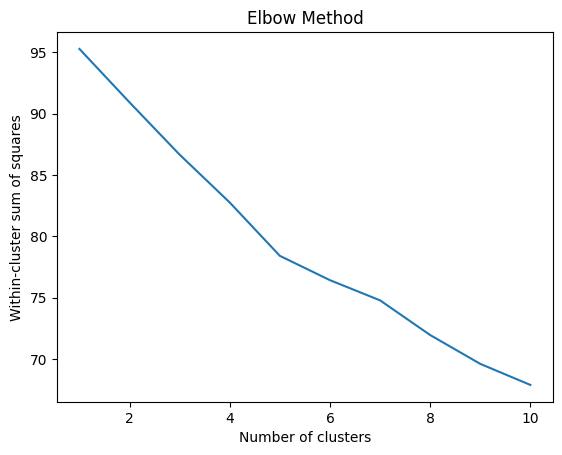

In [82]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# elbow method (teknik untuk menentukan jumlah klaster yang optimal dalam k-means clustering.)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(text_tf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

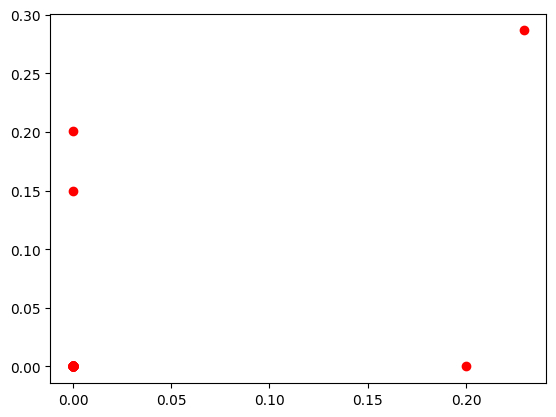

In [85]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Convert the sparse matrix to a dense array (NumPy array) if you have enough memory
text_tf_dense = text_tf.toarray()

plt.plot(text_tf_dense[:,0], text_tf_dense[:,1], 'ro')
plt.show()